### Objective for Exercise

Use your machine learning skills to build a predictive model to help a business function more efficiently.

The goal of this exercise is to do Model Development and Validation to find the answer to the Question 4 of the problem statement:

**Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?**

In this exercise, you will use a feature-engineered dataset to determine whether a predictive model can be built to predict the complaint (of the Complaint Type that you decided to focus on in Week 2) by using past data.

Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance, plot_tree

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("comptrain.csv")

In [3]:
df

,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,Count
0,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44,2
1,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44,1
2,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44,1
3,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44,1
4,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79574,95.0,6280.0,65.0,2.12,4.8,60,2960.0,118.33,1.0,4.0,2.43,1
79575,121.0,2952.0,30.0,1.00,4.8,59,2958.0,118.33,1.0,2.0,2.43,1
79576,121.0,1750.0,35.0,0.59,4.8,58,2958.0,118.33,1.0,2.0,2.43,1
79577,121.0,2280.0,30.0,0.77,4.8,71,2960.0,118.40,2.0,2.0,2.43,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79579 entries, 0 to 79578
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        79579 non-null  float64
 1   BldgArea   79579 non-null  float64
 2   BldgDepth  79579 non-null  float64
 3   BuiltFAR   79579 non-null  float64
 4   FacilFAR   79579 non-null  float64
 5   Lot        79579 non-null  int64  
 6   LotArea    79579 non-null  float64
 7   LotDepth   79579 non-null  float64
 8   NumBldgs   79579 non-null  float64
 9   NumFloors  79579 non-null  float64
 10  ResidFAR   79579 non-null  float64
 11  Count      79579 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 7.3 MB


In [5]:
df.describe(include='all')

,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,Count
count,79579.000000,7.957900e+04,79579.000000,79579.000000,79579.000000,79579.000000,7.957900e+04,79579.000000,79579.000000,79579.000000,79579.000000,79579.000000
mean,76.951243,7.848951e+03,50.813347,1.183410,2.841613,98.750198,5.446940e+03,102.507038,1.244851,2.470468,1.737797,1.000716
std,29.311971,5.910959e+04,25.152340,1.323196,1.559547,371.276390,3.999712e+04,38.707632,1.415848,1.352439,1.263506,0.046620
min,3.000000,2.000000e+01,2.000000,0.010000,1.000000,1.000000,2.970000e+02,10.000000,1.000000,0.500000,0.500000,1.000000
25%,60.000000,1.722000e+03,36.000000,0.630000,2.000000,20.000000,2.185000e+03,95.000000,1.000000,2.000000,0.900000,1.000000
50%,85.000000,2.310000e+03,46.000000,0.900000,2.000000,41.000000,2.500000e+03,100.000000,1.000000,2.000000,1.250000,1.000000
75%,100.000000,3.300000e+03,56.000000,1.300000,4.800000,71.000000,3.804000e+03,101.000000,1.000000,3.000000,2.430000,1.000000
max,220.000000,1.354011e+07,950.000000,238.090000,10.000000,7505.000000,5.048550e+06,2000.000000,251.000000,42.000000,10.000000,12.000000


In [6]:
df.shape

(79579, 12)

In [7]:
df.columns

Index(['Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR', 'Count'], dtype='object')

### Create a random dataset of 10000 rows

In [8]:
df = df.sample(n=10000, random_state=0)

In [9]:
df

,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,Count
70667,90.0,2673.0,30.0,0.35,2.0,46,7739.0,156.51,1.0,2.5,0.90,1
63795,90.0,5025.0,36.0,0.74,1.0,1189,6769.0,95.00,2.0,3.0,0.60,1
4271,100.0,3065.0,55.0,0.17,1.0,29,18525.0,200.00,1.0,1.5,0.60,1
14463,95.0,16868.0,125.0,1.55,4.8,19,10866.0,180.00,1.0,2.0,2.43,1
34371,75.0,2140.0,53.5,0.85,1.0,17,2512.0,102.17,1.0,2.0,0.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75893,110.0,3060.0,54.0,0.72,2.0,63,4250.0,85.00,2.0,2.0,1.25,1
29858,33.0,2100.0,50.0,0.63,2.0,42,3308.0,100.00,1.0,1.0,0.90,1
76874,14.0,3270.0,54.0,1.73,4.8,31,1892.0,94.58,1.0,3.0,3.44,1
76276,100.0,2310.0,52.0,0.69,2.0,16,3325.0,100.00,2.0,2.0,0.90,1


### Train Test Split

In [10]:
X = df.iloc[:,0:11]
y = df.iloc[:,11]

In [11]:
X.values, y.values

(array([[9.000e+01, 2.673e+03, 3.000e+01, ..., 1.000e+00, 2.500e+00,
         9.000e-01],
        [9.000e+01, 5.025e+03, 3.600e+01, ..., 2.000e+00, 3.000e+00,
         6.000e-01],
        [1.000e+02, 3.065e+03, 5.500e+01, ..., 1.000e+00, 1.500e+00,
         6.000e-01],
        ...,
        [1.400e+01, 3.270e+03, 5.400e+01, ..., 1.000e+00, 3.000e+00,
         3.440e+00],
        [1.000e+02, 2.310e+03, 5.200e+01, ..., 2.000e+00, 2.000e+00,
         9.000e-01],
        [9.500e+01, 2.550e+03, 4.500e+01, ..., 1.000e+00, 2.500e+00,
         6.000e-01]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

### Feature Scaling

In [14]:
X_train

,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
69999,95.0,1184.0,34.0,0.49,2.0,73,2435.0,97.42,2.0,2.0,0.90
69350,121.0,1763.0,30.0,0.43,2.0,11,4134.0,103.42,2.0,2.5,1.25
52025,70.0,2156.0,40.0,0.63,2.0,3,3400.0,100.00,1.0,2.0,0.90
74052,15.0,3213.0,64.0,1.25,2.0,27,2577.0,103.06,1.0,3.0,1.25
75085,70.0,2144.0,37.0,0.86,4.8,48,2500.0,100.00,1.0,2.0,2.43
...,...,...,...,...,...,...,...,...,...,...,...
63518,90.0,4053.0,35.0,0.21,1.0,12,19056.0,274.00,1.0,2.0,0.50
51251,110.0,2568.0,56.0,1.02,6.5,131,2506.0,100.25,1.0,2.0,6.02
64197,95.0,1088.0,34.0,0.84,2.0,80,1300.0,65.00,1.0,2.0,2.00
1575,60.0,1798.0,37.0,0.68,2.0,110,2633.0,100.00,1.0,3.0,0.90


In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.60307955, -0.2124918 , -0.66706922, ...,  0.90632221,
        -0.35689036, -0.67364732],
       [ 1.48345675, -0.1939745 , -0.82486847, ...,  0.90632221,
         0.01837782, -0.39443263],
       [-0.243437  , -0.18140577, -0.43037034, ..., -0.2811291 ,
        -0.35689036, -0.67364732],
       ...,
       [ 0.60307955, -0.21556202, -0.66706922, ..., -0.2811291 ,
        -0.35689036,  0.20388456],
       [-0.58204361, -0.19285515, -0.54871978, ..., -0.2811291 ,
         0.393646  , -0.67364732],
       [ 0.77238286, -0.20878194, -0.39092053, ...,  0.90632221,
        -0.35689036, -0.67364732]])

In [19]:
X_test_scaled

array([[ 1.41573543, -0.15684396, -0.11477183, ..., -0.2811291 ,
        -0.35689036, -0.39443263],
       [-2.03805207, -0.12271969,  0.0035776 , ..., -0.2811291 ,
         1.14418236,  1.35265356],
       [ 0.56921889, -0.14545855,  1.14762219, ..., -0.2811291 ,
        -0.35689036,  0.54691975],
       ...,
       [ 0.26447293, -0.12786871,  0.5953248 , ..., -0.2811291 ,
        -0.35689036, -0.39443263],
       [ 0.60307955,  0.61314294,  1.46322069, ..., -0.2811291 ,
         1.89471872,  3.4108647 ],
       [ 0.60307955, -0.14545855,  1.14762219, ..., -0.2811291 ,
        -0.35689036, -0.39443263]])

### Model Training

### Random Forest Regressor

In [20]:
rf = RandomForestRegressor(random_state=0)

In [21]:
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=0)

In [22]:
rf_pred = rf.predict(X_test_scaled)

In [23]:
rf_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Model Evaluation

In [24]:
mse = mean_squared_error(y_test,rf_pred)
mse

0.00279745

In [25]:
rmse = np.sqrt(mse)
rmse

0.05289092549766926

In [26]:
r2score = r2_score(y_test,rf_pred)
r2score

-0.12178446115288244

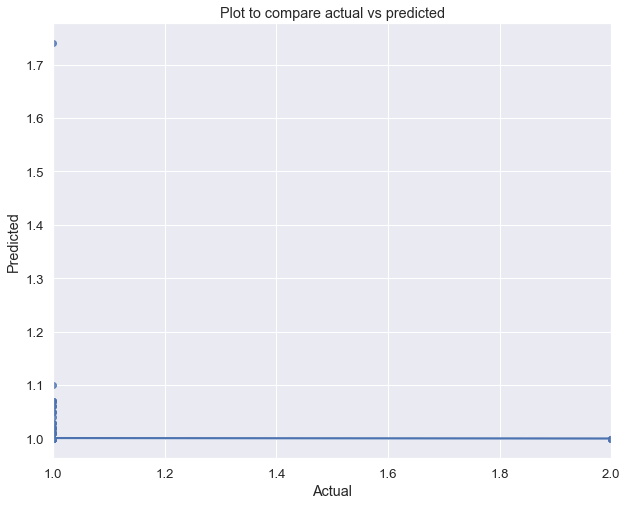

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=rf_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [28]:
rf.feature_importances_

array([4.65273060e-02, 1.43178602e-01, 7.00548184e-02, 1.21470564e-01,
       1.25772026e-02, 1.66770050e-01, 3.82895160e-01, 2.79611086e-02,
       2.25418728e-04, 1.50353311e-02, 1.33044381e-02])

Load the feature importances into a pandas series indexed by your column names, then use its plot method. e.g. for an sklearn RF classifier/regressor model trained using df: 

In [29]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [30]:
feat_importances

Age          0.046527
BldgArea     0.143179
BldgDepth    0.070055
BuiltFAR     0.121471
FacilFAR     0.012577
Lot          0.166770
LotArea      0.382895
LotDepth     0.027961
NumBldgs     0.000225
NumFloors    0.015035
ResidFAR     0.013304
dtype: float64

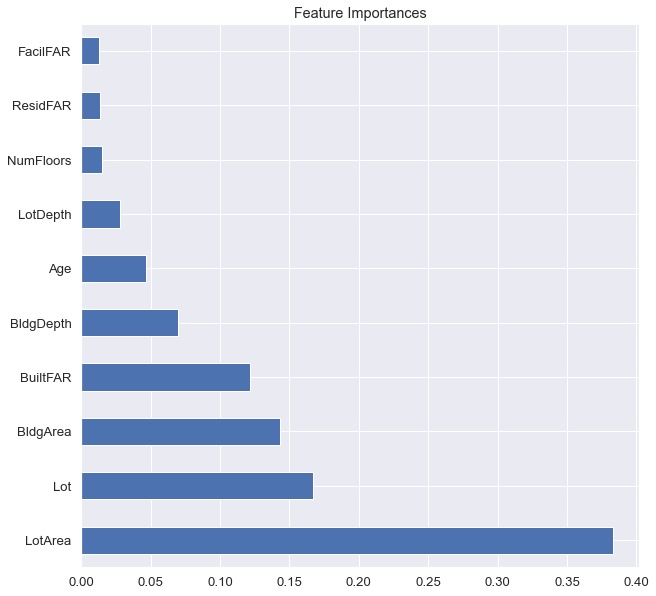

In [31]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### The permutation based importance

In [32]:
perm_importance = permutation_importance(rf,X_test,y_test, random_state=0, scoring='neg_mean_squared_error')

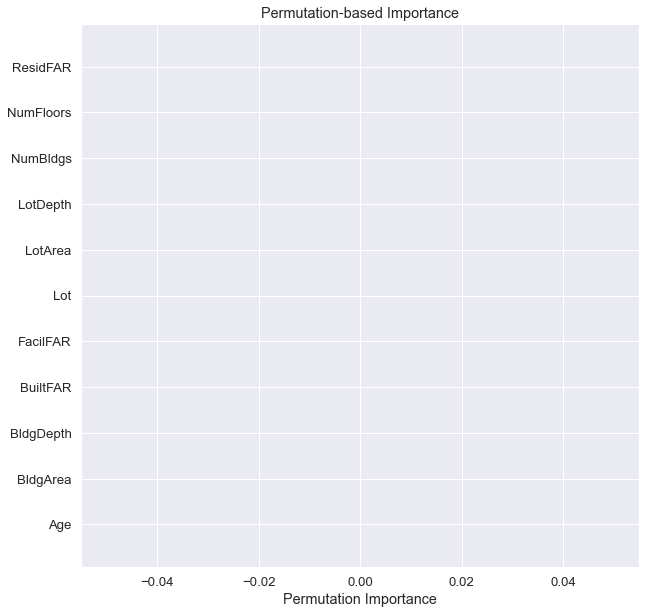

In [33]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.title("Permutation-based Importance")
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [34]:
perm_importance.importances_mean.argsort()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Compute Importance from SHAP Values

In [35]:
explainer = shap.TreeExplainer(rf)

In [36]:
shap_values = explainer.shap_values(X_test)

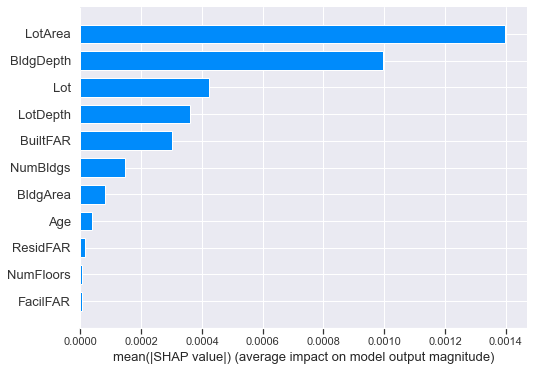

In [37]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

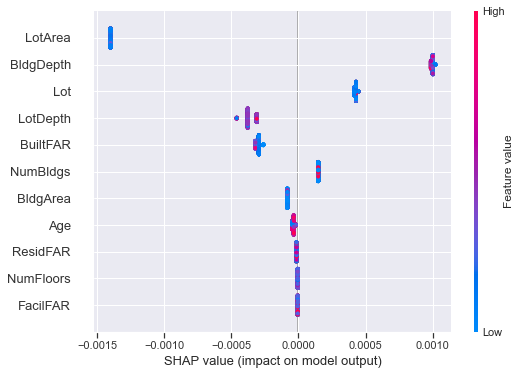

In [38]:
shap.summary_plot(shap_values, X_test)

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [39]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [40]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [41]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='neg_mean_squared_error')

In [42]:
randm.fit(X_train_scaled, y_train)

[09:12:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
           

In [43]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning rate=0.1, learning_rate=0.300000012, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0.30000000000000004,
             reg_lambda=0.8, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
randm.best_score_

-0.0008747257847772971

In [45]:
randm.best_params_

{'subsample': 0.6,
 'reg_lambda': 0.8,
 'reg_alpha': 0.30000000000000004,
 'n_estimators': 800,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning rate': 0.1,
 'gamma': 4,
 'colsample_bytree': 0.5}

### Final Model

In [46]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=800, objective='reg:squarederror',
                       subsample=0.6,reg_lambda=0.8,reg_alpha=0.3, min_child_weight=1,
                       max_depth=6,learning_rate=0.1,gamma=4,colsample_bytree=0.5)

In [47]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:0.45524
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.41045
[2]	validation_0-rmse:0.37027
[3]	validation_0-rmse:0.33415
[4]	validation_0-rmse:0.30170
[5]	validation_0-rmse:0.27257
[6]	validation_0-rmse:0.24645
[7]	validation_0-rmse:0.22309
[8]	validation_0-rmse:0.20217
[9]	validation_0-rmse:0.18348
[10]	validation_0-rmse:0.16675
[11]	validation_0-rmse:0.15183
[12]	validation_0-rmse:0.13853
[13]	validation_0-rmse:0.12676
[14]	validation_0-rmse:0.11628
[15]	validation_0-rmse:0.10705
[16]	validation_0-rmse:0.09892
[17]	validation_0-rmse:0.09183
[18]	validation_0-rmse:0.08564
[19]	validation_0-rmse:0.08025
[20]	validation_0-rmse:0.07559
[21]	validation_0-rmse:0.07155
[22]	validation_0-rmse:0.06810
[23]	validation_0-rmse:0.06517
[24]	validation_0-rmse:0.06268
[25]	validation_0-rmse:0.06060
[26]	validation_0-rmse:0.05883
[27]	validation_0-rmse:0.05733
[28]	validation_0-rmse:0.05608
[29]	validation_0-rmse:0.05505
[30]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.3, reg_lambda=0.8, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = xgbmodel.predict(X_test_scaled)

In [49]:
y_pred

array([1.0004668, 1.0004668, 1.0004668, ..., 1.0004668, 1.0004668,
       1.0004668], dtype=float32)

### Model Evaluation

In [50]:
mse = mean_squared_error(y_test,y_pred)
mse

0.002497883806363461

In [51]:
rmse = np.sqrt(mse)
rmse

0.04997883358346272

In [52]:
r2score = r2_score(y_test,y_pred)
r2score

-0.0016576667121650512

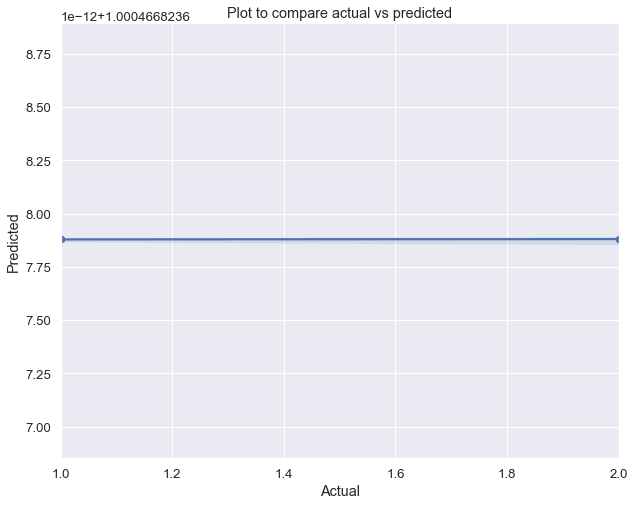

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [54]:
X.columns

Index(['Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR'], dtype='object')

In [55]:
xgbmodel.get_booster().feature_names = ['Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR']

ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

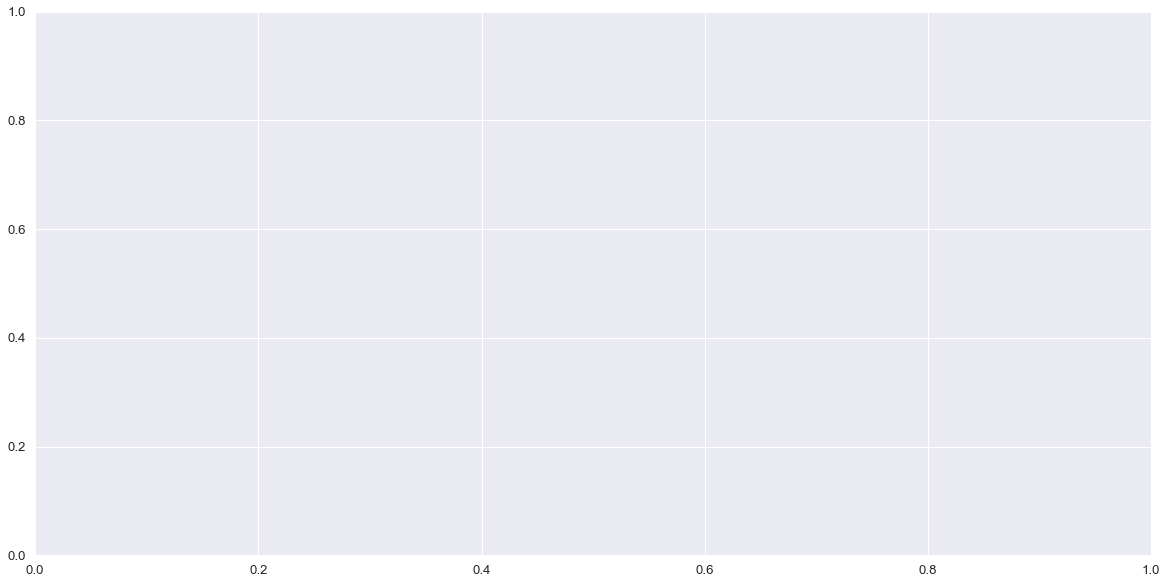

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [59]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s finished


In [60]:
cv.mean()

-0.0003095189362924078

### Save the Model

In [61]:
filename = 'complainmodel.sav'
dump(xgbmodel,open(filename,'wb'))

### Load the Model

In [62]:
loaded_model = load(open(filename,'rb'))

In [63]:
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.3, reg_lambda=0.8, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)